In [ ]:
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

In [ ]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [ ]:
# Load model for feature extraction
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input for VGG16
    features = model.predict(img_data)
    return features

In [ ]:
# Load images and extract features for training set
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features.flatten())
        y_train.append(i)

1/1 [==============================] - 1s 808ms/step


In [ ]:
# Load images and extract features for test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features.flatten())
        y_test.append(i)

1/1 [==============================] - 0s 485ms/step


In [ ]:
# Train GBM classifier
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predict on test set
y_pred = gbm.predict(x_test)

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1 1 1 2 0]
 [1 3 0 1 0]
 [1 0 3 1 0]
 [0 0 2 1 2]
 [0 0 0 0 5]]


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.75      0.60      0.67         5
           2       0.50      0.60      0.55         5
           3       0.20      0.20      0.20         5
           4       0.71      1.00      0.83         5

    accuracy                           0.52        25
   macro avg       0.50      0.52      0.50        25
weighted avg       0.50      0.52      0.50        25




Accuracy: 0.52
Precision: 0.4995238095238095
Recall: 0.52
F1 Score: 0.499090909090909


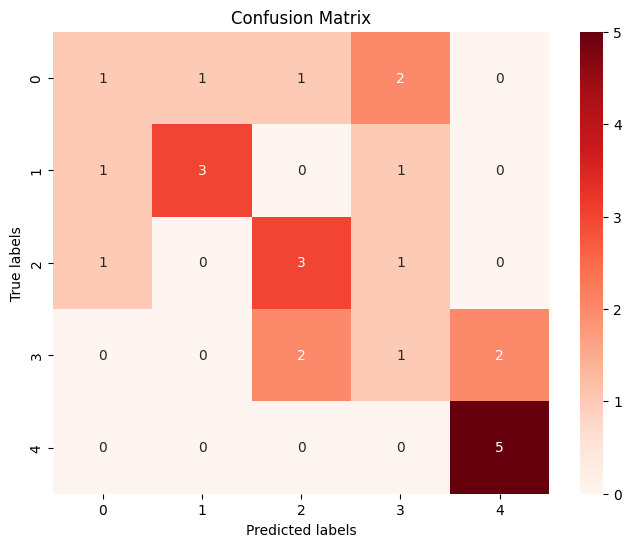

In [ ]:
# Performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()